In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid ="eb37404a619747e8b43050b7d040c682" 
secret = "7ef48f706ccd4eef88e1a20149dcbe29"

client_credentials_manager = SpotifyClientCredentials(client_id = cid, client_secret = secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


Spotify uses attributes as metrics to describe songs that are available on its platforms. The following would be the descriptions of the respective attributes: 

a) danceability: Measure of how suitable the song is danceable. 0.0 (Least Danceable) - 1.0 (Most Danceable)

b) energy: Measure of intensity and activity. 0.0 (Least Energy) - 1.0 (Highest Energy) 

c) loudness: Measure of the sound's intensity. -60 (Softest) - 0 (Loudest) 

d) speechiness: Measure of the presence of words in a song. 0.0 (Non-speech) - 1.0 (Very Speechy)

e) acousticness: Measure of how acoustic a song is. 0.0 (Least Confidence) - 1.0 (Most Confidence)

f) instrumentalness: Predicts whether track contains no vocal. 0.0 (Completely Vocal) - 1.0 (No Vocal Content)

g) liveness: Measure of whether song is performed live. 0.0 (Least likelihood to be performed live) - 1.0 (Strongest likelihood to be performed live)

h) valence: Measure of positiveness of the song. 0.0 (Most Negative) - 1.0 (Most Positive)

i) tempo: Measure of average beat duration.


In [ ]:
search = input("What's the name of the artist you want to search? ")

#Getting the artist ID to be used
artist = sp.search(search,1,0, "artist")
if(artist['artists']['items'] != []):
    artist_item = artist['artists']['items'][0]
    artist_id = artist_item['id']
    artist_name = artist_item['name']

    #To retrieve the ID on each album by the artist
    album_ids = []
    album_catalog = sp.artist_albums(artist_id, album_type = "album", country = "SG")
    album_items = album_catalog['items']
    #print(album_catalog['items'][0])
    for album_item in album_items:
        album_ids.append(album_item['id'])

    #To retrieve track IDs on the album and their relevant information
    count = 0
    danceability = 0
    energy = 0 
    loudness = 0 
    speechiness = 0 
    acousticness = 0 
    instrumentalness = 0
    liveness = 0 
    valence = 0
    tempo = 0 
    for album_id in album_ids:
        album_tracks = sp.album_tracks(album_id) 
        track_items = album_tracks['items']
        for track_item in track_items:
            count += 1
            track_id = track_item['id']
            track_info = sp.audio_features(track_id)[0]
            danceability += track_info['danceability']
            energy += track_info['energy']
            loudness += track_info['loudness']
            speechiness += track_info['speechiness']
            acousticness += track_info['acousticness']
            instrumentalness += track_info['instrumentalness']
            liveness += track_info['liveness']
            valence += track_info['valence']
            tempo += track_info['tempo']
            #print(track_item['name'])
            #print(track_info)

    #Showing Average Stats of Artist 
    a_danceability = danceability / count
    a_energy = energy / count
    a_loudness = energy / count
    a_speechiness = speechiness / count
    a_acousticness = acousticness / count
    a_instrumentalness = instrumentalness / count 
    a_liveness = liveness / count 
    a_valence = valence / count 
    a_tempo = tempo / count 

    print()
    print("Average Stats for " + artist_name)
    print("Danceability: " + str(a_danceability))
    print("Energy: " + str(a_energy))
    print("Loudness: " + str(a_loudness))
    print("Speechiness: " + str(a_speechiness))
    print("Acousticness: " + str(a_acousticness))
    print("Instrumentalness: " + str(a_instrumentalness))
    print("Liveness: " + str(a_liveness))
    print("Valence: " + str(a_valence))
    print("Tempo: " + str(a_tempo))
else: 
    print("No Artist Found!")

In [21]:
username = "Spotify"
playlist_id = "37i9dQZF1DWXjg4w8L3Now"
top_50 = sp.user_playlist_tracks(username, playlist_id=playlist_id)
top_50_items = top_50['items']
top_50_dict = {}
for top_50_item in top_50_items:
    track = top_50_item['track']
    main_artist = track['artists'][0]
    top_50_dict[main_artist['name']] = main_artist['id']
print(top_50_dict)

def artist_stats(artist_id):
    #To retrieve the ID on each album by the artist
    album_ids = []
    album_catalog = sp.artist_albums(artist_id, album_type = "album", country = "SG")
    album_items = album_catalog['items']
    #print(album_catalog['items'][0])
    if(album_items == []):
        return []
    for album_item in album_items:
        album_ids.append(album_item['id'])

    #To retrieve track IDs on the album and their relevant information
    count = 0
    danceability = 0
    energy = 0 
    loudness = 0 
    speechiness = 0 
    acousticness = 0 
    instrumentalness = 0
    liveness = 0 
    valence = 0
    tempo = 0 
    for album_id in album_ids:
        album_tracks = sp.album_tracks(album_id) 
        track_items = album_tracks['items']
        for track_item in track_items:
            count += 1
            track_id = track_item['id']
            track_info = sp.audio_features(track_id)[0]
            danceability += track_info['danceability']
            energy += track_info['energy']
            loudness += track_info['loudness']
            speechiness += track_info['speechiness']
            acousticness += track_info['acousticness']
            instrumentalness += track_info['instrumentalness']
            liveness += track_info['liveness']
            valence += track_info['valence']
            tempo += track_info['tempo']
            #print(track_item['name'])
            #print(track_info)

    #Showing Average Stats of Artist 
    a_danceability = danceability / count
    a_energy = energy / count
    a_loudness = energy / count
    a_speechiness = speechiness / count
    a_acousticness = acousticness / count
    a_instrumentalness = instrumentalness / count 
    a_liveness = liveness / count 
    a_valence = valence / count 
    a_tempo = tempo / count 
    
    average =  [a_danceability, a_energy, a_loudness, a_speechiness, a_acousticness, a_instrumentalness, a_liveness, a_valence,
               a_tempo]

    return average

stats = {}
#print(artist_stats("3TVXtAsR1Inumwj472S9r4"))
for key in top_50_dict:
        stats[key] = artist_stats(top_50_dict[key])
    
print(stats['Drake'])


{'Drake': '3TVXtAsR1Inumwj472S9r4', 'Post Malone': '246dkjvS1zLTtiykXe5h60', 'XXXTENTACION': '15UsOTVnJzReFVN1VCnxy4', 'J Balvin': '1vyhD5VmyZ7KMfW5gqLgo5', 'Ed Sheeran': '6eUKZXaKkcviH0Ku9w2n3V', 'Eminem': '7dGJo4pcD2V6oG8kP0tJRR', 'Ozuna': '1i8SpTcr7yvPOmcqrbnVXY', 'Bad Bunny': '4q3ewBCX7sLwd24euuV69X', 'Khalid': '6LuN9FCkKOj5PcnpouEgny', 'Ariana Grande': '66CXWjxzNUsdJxJ2JdwvnR', 'Kendrick Lamar': '2YZyLoL8N0Wb9xBt1NhZWg', 'Imagine Dragons': '53XhwfbYqKCa1cC15pYq2q', 'Travis Scott': '0Y5tJX1MQlPlqiwlOH1tJY', 'Dua Lipa': '6M2wZ9GZgrQXHCFfjv46we', 'The Weeknd': '1Xyo4u8uXC1ZmMpatF05PJ', 'Kanye West': '5K4W6rqBFWDnAN6FQUkS6x', 'David Guetta': '1Cs0zKBU1kc0i8ypK3B9ai', 'BTS': '3Nrfpe0tUJi4K4DXYWgMUX', 'Maroon 5': '04gDigrS5kc9YWfZHwBETP', 'Cardi B': '4kYSro6naA4h99UJvo89HB', 'Marshmello': '64KEffDW9EtZ1y2vBYgq8T', 'Migos': '6oMuImdp5ZcFhWP0ESe6mG', 'Shawn Mendes': '7n2wHs1TKAczGzO7Dd2rGr', 'Taylor Swift': '06HL4z0CvFAxyc27GXpf02', 'Camila Cabello': '4nDoRrQiYLoBzwC5BhVJzF', 'Calvin Harr

In [35]:
#del stats['Martin Garrix']
print(len(stats))

49


In [66]:
import pandas as pd 
pd.DataFrame.from_dict(stats, orient='index', columns = ['Danceability', 'Energy', 
                                                         'Loudness', 'Speechiness', 
                                                         'Acousticness', 'Instrumentalness', 
                                                         'Liveness', 'Valence', 'Tempo'])

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Drake,0.669314,0.542217,0.542217,0.228377,0.185113,0.003716,0.192322,0.342346,118.104726
Post Malone,0.623912,0.611397,0.611397,0.074004,0.322343,0.016056,0.141524,0.338662,125.961691
XXXTENTACION,0.694506,0.421130,0.421130,0.216100,0.418651,0.045400,0.161082,0.421808,120.433051
J Balvin,0.725017,0.723717,0.723717,0.118333,0.218317,0.019056,0.179975,0.717124,132.613076
Ed Sheeran,0.651190,0.517420,0.517420,0.091657,0.486643,0.010759,0.231656,0.519832,106.468321
Eminem,0.706789,0.713299,0.713299,0.308729,0.224708,0.009407,0.323157,0.536733,109.620241
Ozuna,0.723944,0.736056,0.736056,0.084347,0.271769,0.000314,0.166992,0.642194,128.899417
Bad Bunny,0.733800,0.574867,0.574867,0.115347,0.277893,0.000327,0.158833,0.298133,130.888467
Khalid,0.623103,0.500448,0.500448,0.087976,0.495407,0.143262,0.171562,0.399103,106.951724
Ariana Grande,0.630711,0.598108,0.598108,0.077073,0.213872,0.000028,0.175927,0.448647,114.133253


In [129]:
import pandas as pd 

def all_artist_songs(artist_id):
    #To retrieve the ID on each album by the artist
    album_ids = []
    album_catalog = sp.artist_albums(artist_id, album_type = "album", country = "SG")
    album_items = album_catalog['items']
    #print(album_catalog['items'][0])
    if(album_items == []):
        return []
    for album_item in album_items:
        album_ids.append(album_item['id'])

    #To retrieve track IDs on the album and their relevant information
    track_list = {}
    for album_id in album_ids:
        album_tracks = sp.album_tracks(album_id) 
        track_items = album_tracks['items']
        for track_item in track_items:
            track_id = track_item['id']
            track_name = track_item['name']
            track_info = sp.audio_features(track_id)[0]
            song = [track_info['danceability'],
                    track_info['energy'],
                    track_info['loudness'],
                    track_info['speechiness'],
                    track_info['acousticness'],
                    track_info['instrumentalness'],
                    track_info['liveness'],
                    track_info['valence'],
                    track_info['tempo']]
            track_list[track_name] = song
        

    return track_list

search = input("What's the name of the artist you want to search? ")
artist = sp.search(search,1,0, "artist")
if(artist['artists']['items'] != []):
    artist_item = artist['artists']['items'][0]
    artist_id = artist_item['id']
    artist_name = artist_item['name']
    track_list = all_artist_songs(artist_id)
    table = pd.DataFrame.from_dict(track_list, orient='index', columns = ['Danceability', 'Energy', 
                                                         'Loudness', 'Speechiness', 
                                                         'Acousticness', 'Instrumentalness', 
                                                         'Liveness', 'Valence', 'Tempo'])
else:
    print("No Artist Found")


What's the name of the artist you want to search? Florence the Machine


In [18]:
table1 = table[['Energy', 'Valence']]
table

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Airbag (Remastered),0.319,0.935,-5.709,0.0548,0.009890,0.824000,0.1280,0.6300,167.677
Paranoid Android (Remastered),0.332,0.826,-7.269,0.0497,0.027500,0.008400,0.2340,0.2160,125.636
Subterranean Homesick Alien (Remastered),0.326,0.636,-7.092,0.0286,0.026100,0.005120,0.1080,0.2560,149.632
Exit Music (For a Film) (Remastered),0.355,0.296,-10.074,0.0321,0.148000,0.130000,0.6440,0.2050,121.599
Let Down (Remastered),0.364,0.752,-7.125,0.0312,0.000087,0.361000,0.0930,0.1220,102.754
Karma Police (Remastered),0.389,0.577,-7.578,0.0276,0.039700,0.000052,0.1070,0.3670,74.551
Fitter Happier (Remastered),0.434,0.368,-15.419,0.2310,0.836000,0.003300,0.1230,0.6890,127.186
Electioneering (Remastered),0.204,0.951,-4.345,0.0621,0.002480,0.111000,0.2670,0.4400,78.840
Climbing Up the Walls (Remastered),0.266,0.633,-6.933,0.0386,0.092900,0.482000,0.1850,0.2270,66.425
No Surprises (Remastered),0.274,0.449,-9.303,0.0279,0.039200,0.004300,0.1140,0.0797,76.154


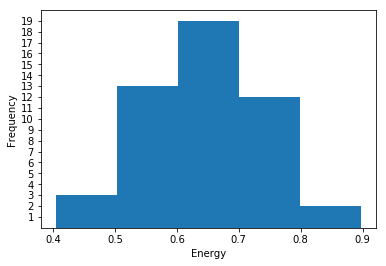

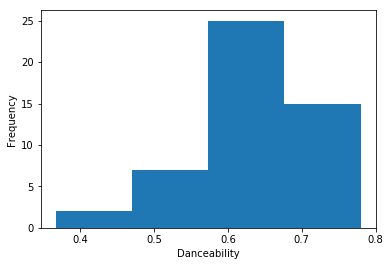

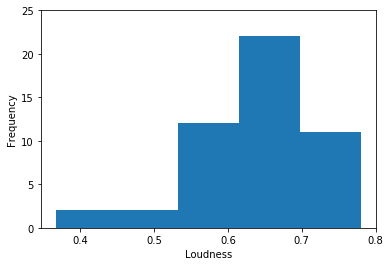

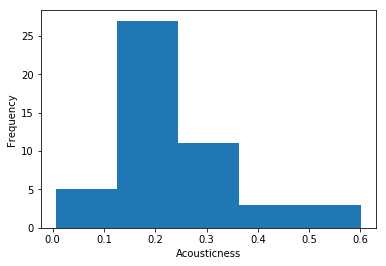

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = stat['Energy'].sort_values()

energy = plt.hist(x, bins = 5)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.yticks(range(1, 20))
plt.show()

dance = stat['Danceability'].sort_values()

y = plt.hist(dance, bins = 4)
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.yticks(range(0, 30, 5))
plt.show()

loud = stat['Loudness'].sort_values()

y = plt.hist(dance, bins = 5)
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.yticks(range(0, 30, 5))
plt.show()

acoustic = stat['Acousticness'].sort_values()

y = plt.hist(acoustic, bins = 5)
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.yticks(range(0, 30, 5))
plt.show()




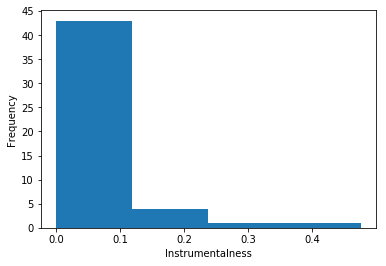

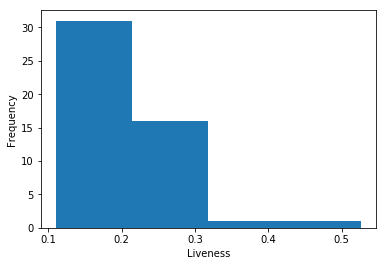

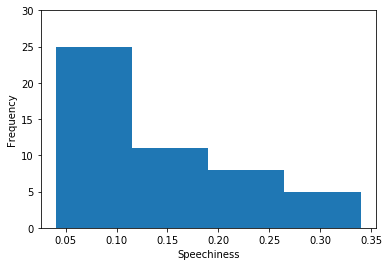

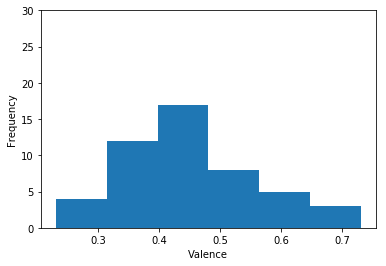

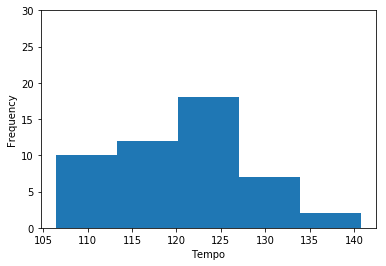

In [128]:
instrumental = stat['Instrumentalness'].sort_values()

y = plt.hist(instrumental, bins = 4)
plt.xlabel('Instrumentalness')
plt.ylabel('Frequency')
plt.yticks(range(0, 50, 5))
plt.show()

liveness = stat['Liveness'].sort_values()

y = plt.hist(liveness, bins = 4)
plt.xlabel('Liveness')
plt.ylabel('Frequency')
plt.yticks(range(0, 35, 5))
plt.show()

speech = stat['Speechiness'].sort_values()

y = plt.hist(speech, bins = 4)
plt.xlabel('Speechiness')
plt.ylabel('Frequency')
plt.yticks(range(0, 35, 5))
plt.show()

valence = stat['Valence'].sort_values()

y = plt.hist(valence, bins = 6)
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.yticks(range(0, 35, 5))
plt.show()

tempo = stat['Tempo'].sort_values()

y = plt.hist(tempo, bins = 5)
plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.yticks(range(0, 35, 5))
plt.show()